<h1 align='center'>Term Deposit Subscription Project</h1>

<h2>Business Understanding</h2>

The business focus for this project is to increase the rate of subscription for term deposit by identifying key factors that influence a customer's decision to subscribe.

This involves understanding customer behavior, market trends, and operational factors to develop actionable strategies for marketing and sales.

Project Objective: The objective of this project is to predict whether a client will subscribe to a term deposit (indicated by the variable "y" as "yes" or "no").

The task is to build a predictive model that determines the likelihood of a client subscribing to a term deposit based on the features provided in the dataset.

<h3>Importing Necessary Libraries</h3>

In [ ]:
# Data Manipulation
import numpy as np
import pandas as pd

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Machine Learning, Preprocessing, and Hyperparameter Tuning


<h2>Data Understanding</h2>

1. Relevant Information:

   The data is related with direct marketing campaigns of a banking institution. 
   The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, 
   in order to access if the product (bank term deposit) would be (or not) subscribed. 

   There are two datasets: 
      1) bank-full.csv with all examples, ordered by date (from May 2008 to November 2010).
      2) bank.csv with 10% of the examples (4521), randomly selected from bank-full.csv.
   The smallest dataset is provided to test more computationally demanding machine learning algorithms (e.g. SVM).

2. Number of Instances: 45211 for bank-full.csv (4521 for bank.csv)

3. Number of Attributes: 16 + output attribute.

4. Attribute information:

- bank client data:

   1. age (numeric)
   2. job : type of job (categorical: "admin.","unknown","unemployed","management","housemaid","entrepreneur","student",
                                       "blue-collar","self-employed","retired","technician","services") 
   3. marital : marital status (categorical: "married","divorced","single"; note: "divorced" means divorced or widowed)
   4. education (categorical: "unknown","secondary","primary","tertiary")
   5. default: has credit in default? (binary: "yes","no")
   6. balance: average yearly balance, in euros (numeric) 
   7. housing: has housing loan? (binary: "yes","no")
   8. loan: has personal loan? (binary: "yes","no")

- related with the last contact of the current campaign:

   9. contact: contact communication type (categorical: "unknown","telephone","cellular") 
  10. day: last contact day of the month (numeric)
  11. month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")
  12. duration: last contact duration, in seconds (numeric)

- other attributes:

  13. campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
  14. pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted)
  15. previous: number of contacts performed before this campaign and for this client (numeric)
  16. poutcome: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")

- Output variable (desired target):

  17. y - has the client subscribed a term deposit? (binary: "yes","no")


<h3>Hypothesis</h3>

<h4>Null Hypothesis: Age has no effect on the likelihood of subscribing to a term deposit.</h4>

<h4>Alternate Hypothsis: Age has a significant effect on the likelihood of subscribing to a term deposit.</h4>


<h3>Analytical Questions</h3>

1. What is the distribution for client subscription over the period? 

2. Which variables show the strongest correlation with subscription status?

3. Does the number of previous contacts affect the likelihood of subscription?

4. Which marketing channels have the highest conversion rates?

5. Do the month or day of contact influence subscription rates?

<h3>Exploratory Data Analysis (EDA)

In [15]:
# Import dataset
df = pd.read_csv("./data/bank-full.csv", delimiter=";")
df.head()   #View first 5 rows of the dataset

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [16]:
f"There are {df.shape[0]} rows and {df.shape[1]} columns in the dataset."

'There are 45211 rows and 17 columns in the dataset.'

In [ ]:
# Check for missing values
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

The result above shows there are no missing values in the dataset.

In [23]:
# Check for duplicates
f"There are {df.duplicated().sum()} duplicated values in the dataset."

'There are 0 duplicated values in the dataset.'

In [ ]:
# Check dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [26]:
# Check unique variables in the columns
df.nunique()

age            77
job            12
marital         3
education       4
default         2
balance      7168
housing         2
loan            2
contact         3
day            31
month          12
duration     1573
campaign       48
pdays         559
previous       41
poutcome        4
y               2
dtype: int64

In [36]:
column_names = df.columns      # Assign column names to a variable

for name in column_names:      # Loop through the column names
    print(name,":", df[name].unique()) # Print unique values in the columns

age : [58 44 33 47 35 28 42 43 41 29 53 57 51 45 60 56 32 25 40 39 52 46 36 49
 59 37 50 54 55 48 24 38 31 30 27 34 23 26 61 22 21 20 66 62 83 75 67 70
 65 68 64 69 72 71 19 76 85 63 90 82 73 74 78 80 94 79 77 86 95 81 18 89
 84 87 92 93 88]
job : ['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']
marital : ['married' 'single' 'divorced']
education : ['tertiary' 'secondary' 'unknown' 'primary']
default : ['no' 'yes']
balance : [ 2143    29     2 ...  8205 14204 16353]
housing : ['yes' 'no']
loan : ['no' 'yes']
contact : ['unknown' 'cellular' 'telephone']
day : [ 5  6  7  8  9 12 13 14 15 16 19 20 21 23 26 27 28 29 30  2  3  4 11 17
 18 24 25  1 10 22 31]
month : ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']
duration : [ 261  151   76 ... 1298 1246 1556]
campaign : [ 1  2  3  5  4  6  7  8  9 10 11 12 13 19 14 24 16 32 18 22 15 17 25 21
 43 51 63 41 26 28 55 50 

Insight:

After inspecting the columns for unique values, it was observed that "unknown" value in the columns contributes to a huge percentage of the dataset hence cannot be dropped as well as treated as missing values.

This means that, we are going to treat "unknown" as a separate category.

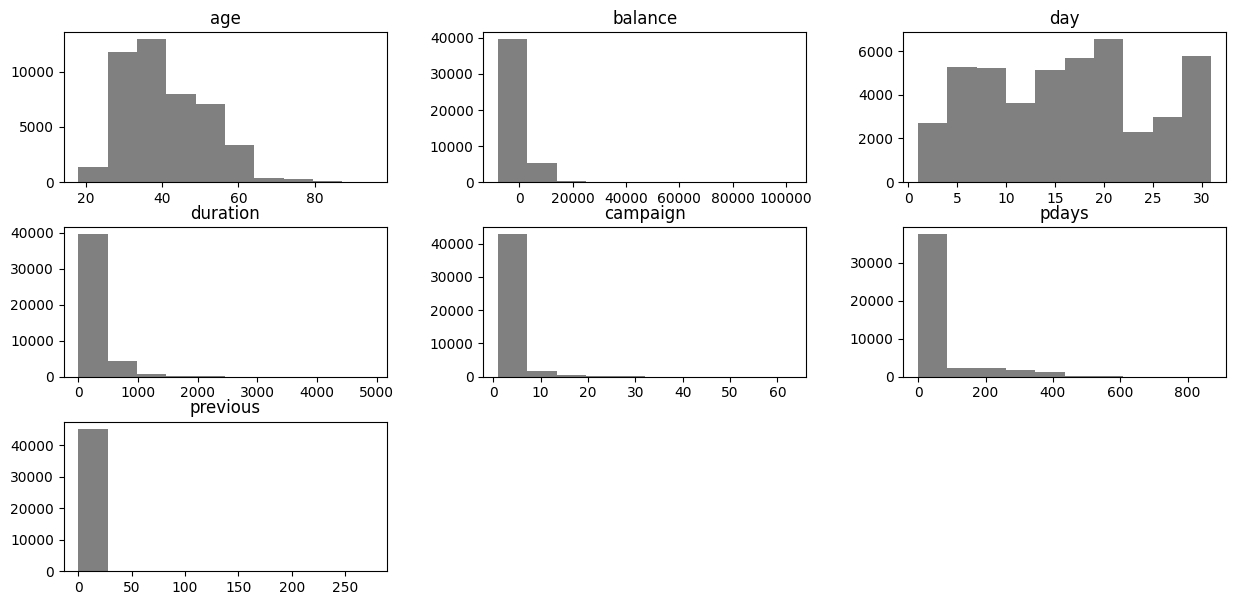

In [53]:
# Check the distribution of the numeric values
df.hist(figsize=(15, 7), grid=False, color="grey");

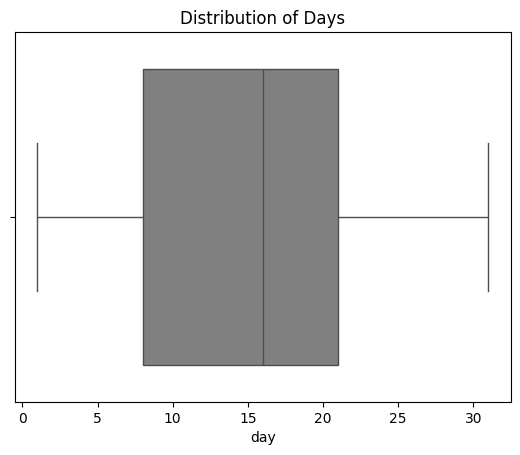

In [ ]:
# Check the individual distribution of days column
sns.boxplot(df['day'], orient="h", color="grey")
plt.title("Distribution of Days")
plt.show()

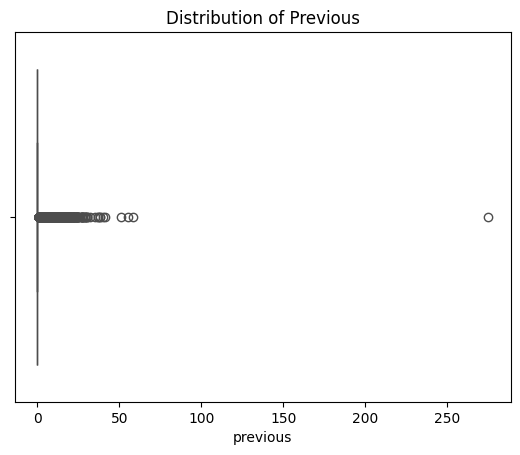

In [ ]:
# Check the individual distribution of previous column
sns.boxplot(df['previous'], orient="h", color="grey")
plt.title("Distribution of Previous")
plt.show()

Insight:

The plot above shows the various distributions for the respective numerical columns. The age column has an approximately normal distribution and columns like balance, duration, campaign, pdays, and previous are all positively skewed.

The day column is normally distributed.

The various distributions for the respective columns apart from normally distributed columns will be corrected as it can have strong influence on our model.

<h3> Answering Analytical Questions</h3>

1. What is the distribution for client subscription over the period? 

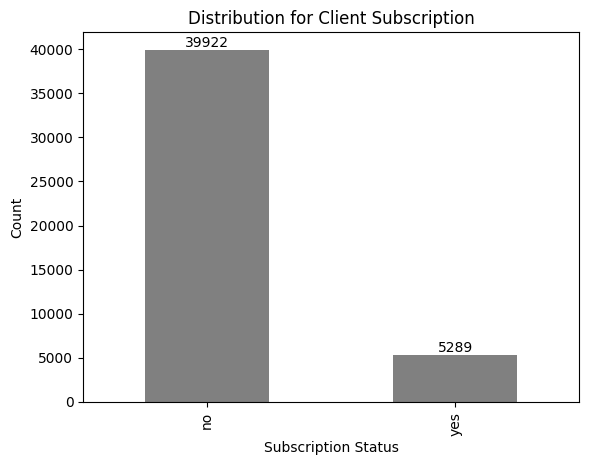

In [72]:
# Get count of subscriber and non-subscriber
subscriber_count = df["y"].value_counts()

ax = subscriber_count.plot(kind="bar", title="Distribution for Client Subscription", color='grey') # Create plot
ax.bar_label(ax.containers[0])     # Add bar labels
plt.xlabel("Subscription Status")  # Add x-axis label
plt.ylabel("Count")                # Add y-axis label
plt.show()


Insight:

The chart above shows us the distribution of subscribers and non-subscribers for term deposit.
We can observe that there is a huge imbalance in the dataset and this must be corrected else our model will be biased towards the output with the highest number.

2. Which variables show the strongest correlation with subscription status?

In [ ]:
corr = 

<h2>Data Preparation</h2>

In [27]:
column_names = df.columns
column_names

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')